# Project: Wine Quality Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This report explores and analyzes characteristics of red wine and white wine datasets retrieved from [UCI Machine Learning Database](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) to answer the below questions:
1.	Do levels of acidity affect the quality of the wine?
2.	Do wines with higher alcoholic content receive better ratings?
3.	Do sweeter wines receive better ratings?
4.	Do red wines or white wines receive better ratings?

<a id='wrangling'></a>
## Data Wrangling
The first step is to import all necessary libraries and load the two dataframes from UCI Machine Learning Database. Then I take a peek at a couple first rows of red wine dataframe.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_white = pd.read_csv('winequality-white.csv', sep = ',')
df_red = pd.read_csv('winequality-red.csv', sep = ',')
df_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


It seems like the csv file is separated by “;” instead of common “,”. Therefore, I reload the dataset using “;” as the seperator

In [66]:
df_white = pd.read_csv('winequality-white.csv', sep = ';')
df_red = pd.read_csv('winequality-red.csv', sep = ';')
# Read the first few rows of red wine dataframe
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [67]:
# Read the first few rows of white wine dataframe
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [68]:
# Check the number of columns on each dataframe
df_red.shape[1],df_white.shape[1]

(12, 12)

### Cleaning headers in both datasets
It looks like bothe datasets share the same numbers of columns, which makes it easier to combine them into one single dataset when doing analysis. However, there are whitespaces in some columns labels that have more than one words
("fix acidity"), which makes it very tricky when indexing since a whitespace is a character in Python. Therefore, replacing the whitespaces with underscores seems like an optimal solution for this.

In [69]:
# replace spaces with underscores and lowercase labels for red white dataframe
df_red.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_red.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [70]:
# replace spaces with underscores and lowercase labels for white white dataframe
df_white.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_white.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


### Investigating the content of red wine and white wine dataframes
This step is done by answering the below questions

#### How many samples of red wine are there? - Is there any missing value?
There are 1599 red wine samples and there is no missing value

In [71]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
ph                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### How many samples of white wine are there? - Is there any missing value?
There are 4898 white wine samples and there is no missing value

In [72]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
ph                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### How many duplicate rows are in the red wine dataframe?

In [73]:
sum(df_red.duplicated())

240

#### How many duplicate rows are in the white wine dataframe?

In [74]:
sum(df_white.duplicated())

937

#### How many unique values of quality are in the red wine dataframe?

In [75]:
df_red['quality'].nunique()

6

#### How many unique values of quality are in the white wine dataframe?

In [76]:
df_white['quality'].nunique()

7

### Combine red wine and white wine dataframes

First, I create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.”

In [77]:
# create color array for red dataframe
color_red = np.repeat('red',df_red.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', df_white.shape[0])

Then, I add arrays to the red and white dataframes.

In [78]:
df_red['color'] = color_red
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [79]:
df_white['color'] = color_white
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Finally, I combine the two dataframes using append() method

In [80]:
# append dataframes
df_wine = df_red.append(df_white)

# view dataframe to check for success
#df_wine.head()
df_wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


It looks like the final dataframe is clean enough. Now, it's time to do some data analysis and visualization.

<a id='eda'></a>
## Exploratory Data Analysis

Based on histograms of columns in this dataset, Fixed Acidity and Alcohol features appear skewed to the right while pH feature shows a normal distribution

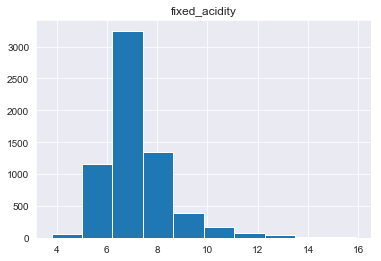

In [81]:
# Fixed Acidity
df_wine.hist('fixed_acidity');

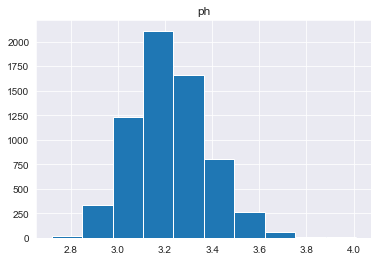

In [82]:
# pH
df_wine.hist('ph');

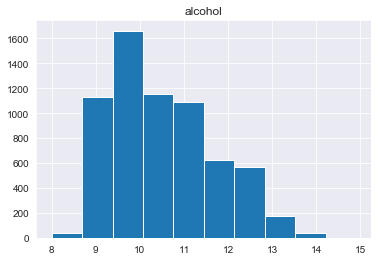

In [83]:
# alcohol
df_wine.hist('alcohol');

Based on scatterplots of quality against different feature variables, among the following :Volatile Acidity, Residual Sugar, pH, Alcohol, it appears that Alcohol is most likely to have a positive impact on quality

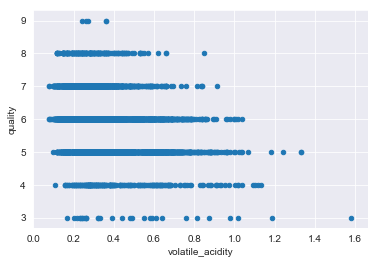

In [84]:
# Volatile Acidity 
df_wine.plot.scatter(x = 'volatile_acidity', y = 'quality');

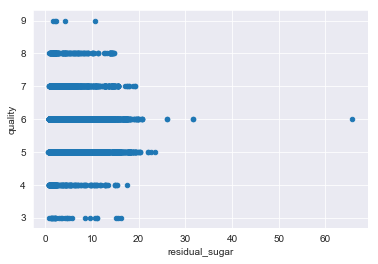

In [85]:
# Residual Sugar
df_wine.plot.scatter(x='residual_sugar',y='quality');

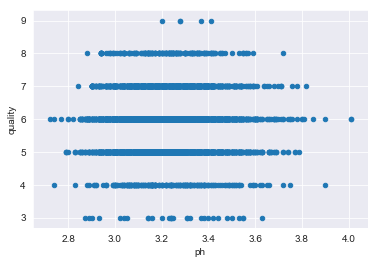

In [86]:
# pH
df_wine.plot.scatter(x='ph',y='quality');

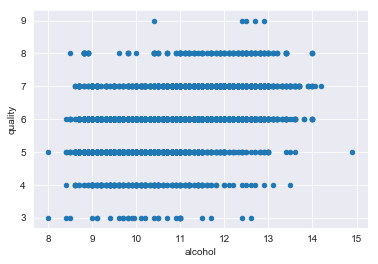

In [87]:
# Alcohol
df_wine.plot.scatter(x='alcohol',y='quality');

<a id='conclusions'></a>
# Conclusions
It's time to answer the questions posed at the beginning of the report.

### 1. Do levels of acidity affect the quality of wine?
To answer this question, I group the pH values of this dataset into four groups: Low, Medium, Moderate High, High. Then, I create a column that contains the group labels to see which pH value falls into which group. Finally, I get the mean quality of each acidity level using groupby method and visualize the result with bar chart.

In [88]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [89]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72,3.11,3.21,3.32,4.01]

In [90]:
# Labels for the four acidity level groups
bin_names = ['High','Moderately High','Medium','Low']

In [91]:
# Creates acidity_levels column
df_wine['acidity_levels'] = pd.cut(df_wine['ph'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [92]:
# Find the mean quality of each acidity level with groupby
df_wine.groupby('acidity_levels').mean()['quality']

acidity_levels
High               5.783343
Moderately High    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64

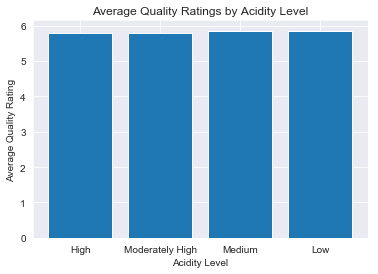

In [93]:
# Create a bar chart with proper labels

location = [1,2,3,4]
heights = [5.783343,5.784540,5.850832,5.859593]
labels = ['High','Moderately High','Medium', 'Low']
plt.bar(location, heights, tick_label = labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

As we can see, the average quality ratings for each acidity level are almost the same. Therefore, the quality of wine is not affect by its acidity level.

### 2. Do wines with higher alcoholic content receive better ratings?
To answer this question, I first find the median value of the Alcohol column. Then, I create two groups, one for the values that are lower than the median, and one for the values that are greater than or equal to the median. Finally, I get the mean quality of each group and draw a bar chart to visualize my answer for this question.

In [94]:
df_wine.describe()['alcohol']

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [95]:
# get the median amount of alcohol content
median_alcohol = df_wine.median()['alcohol']
print(median_alcohol)

10.3


In [96]:
num_samples = df_wine.shape[0]
print(num_samples)

6497


In [97]:
median = df_wine['alcohol'].median()

# select samples with alcohol content less than the median
low_alcohol = df_wine.query('alcohol < {}'.format(median))

# select samples with alcohol content greater than or equal to the median
high_alcohol = df_wine.query('alcohol >= {}'.format(median))

# ensure these queries included each sample exactly once
num_samples = df_wine.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [98]:
# get mean quality rating for the low alcohol and high alcohol groups
low_quality_mean = low_alcohol.mean()['quality']
high_quality_mean = high_alcohol.mean()['quality']
low_quality_mean,high_quality_mean

(5.475920679886686, 6.146084337349397)

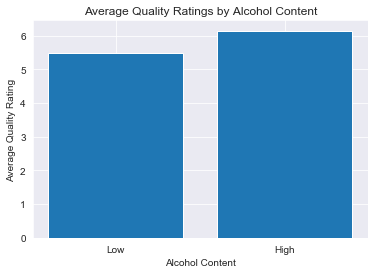

In [99]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [low_quality_mean, high_quality_mean]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

We can see clearly that higher alcohol content does recieve better average quality rating.

### 3. Do sweeter wines receive better ratings?
To answer this question, I use the same approach as with the above question. First, I find the median amount of residual sugar. Then, I categorize the samples into two groups: group with residual sugar less than the meidan, and group with residual sugar greater than or equal to the median. Finally, I find the mean quality of these two groups and visualize my answer using bar chart. 

In [100]:
# get the median amount of residual sugar
median = df_wine.median()['residual_sugar']
median

3.0

In [101]:
# select samples with residual sugar less than the median
low_sugar = df_wine.query('residual_sugar < {}'.format(median))

# select samples with residual sugar greater than or equal to the median
high_sugar = df_wine.query('residual_sugar >= {}'.format(median))

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [102]:
# get mean quality rating for the low sugar and high sugar groups
low_quality_mean = low_sugar.mean()['quality']
high_quality_mean = high_sugar.mean()['quality']
low_quality_mean,high_quality_mean

(5.808800743724822, 5.82782874617737)

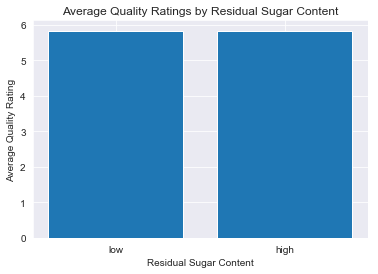

In [103]:
# Create a bar chart with proper labels
location = [1,2]
heights = [low_quality_mean, high_quality_mean]
labels = ['low', 'high']
plt.bar(location, heights, tick_label = labels)
plt.title('Average Quality Ratings by Residual Sugar Content')
plt.xlabel('Residual Sugar Content')
plt.ylabel('Average Quality Rating');

As we can see on the above chart, the average ratings for samples in both high and low residual sugar levels are almost the same (5.83 vs 5.81). Therefore, the quality of wine is not affected by the level of residual sugar.

### 4. Do red wines or white wines receive better ratings?
To answer this question, I get the counts for each rating and color of wine (red vs white). Then, I get the rating proportion of each kind of wine. Finally, I use bar chart to visualize my answer.

#### Create arrays for red bar heights white bar heights
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [104]:
# get counts for each rating and color
color_counts = df_wine.groupby(['color', 'quality']).count()['ph']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: ph, dtype: int64

In [105]:
# get total counts for each color
color_totals = df_wine.groupby('color').count()['ph']
color_totals

color
red      1599
white    4898
Name: ph, dtype: int64

In [106]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: ph, dtype: float64

In [107]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: ph, dtype: float64

Based on the samples proportions of red and white wines that fall into each quality bucket, I see that there are only 6 rating buckets for red wine (3-8) whilst there are 7 rating buckets for white wine (3-9). In order to plot the chart, I will need to create a place-holder with value 9 for red wine proportion.

In [108]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: ph, dtype: float64

### Plot proportions on a bar chart

In [109]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

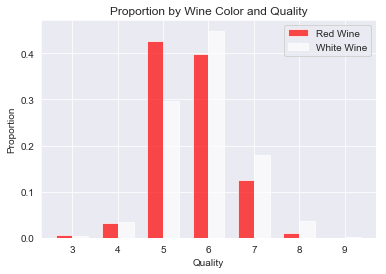

In [110]:
# plot bars
sns.set_style('darkgrid')
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

According to the above chart, we can see that even though more red wines receive a rating of 5 on quality than white wine, for higher quality ratings (6-9), white wines consistently beat red wine. There are no red wine samples receive the highest rating of 9 while there are some white wine in this bucket. Therefore we can safely conclude that white wine receive better ratings than red wine.
Note: This conclusion is made within the context of the provided datasets. 